In [1]:
%load_ext autoreload
%autoreload 2
from utils import *
from KeywordExtractor import *
from gensim.models import Word2Vec
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.corpus import wordnet


In [14]:
# WORD EMBEDDINGS
from gensim.models import Word2Vec, KeyedVectors
import gensim.downloader as api
# Download a pre-trained Word2Vec model (you can choose other models as well)
model_name = "glove-wiki-gigaword-50"

# Download and load the model (this might take a while to download)
# model = api.load(model_name)
# model.save('data/model.model')

In [24]:
abstract = load_abstract('ex2')
#abstract = "The country of Japan has developed to a great economy after WW1. Japan is a developed island nation. The cats are jumping over the fences."
#abstract = "I like deep learning. I like NLP. I enjoy flying. Japan is a developed island nation. I like Japan because it is an island. "
ke = KeywordExtractor(abstract=abstract)
print(ke.tokens)
print(ke.sentences)
print(ke.co)
ke.graph.nodes

['usage', 'optical_character_recognition', 'ocr', 'system', 'widely', 'spread', 'technology', 'world', 'computer_vision', 'machine_learning', 'topic', 'interest', 'many', 'field', 'example', 'automotive', 'become', 'specialized', 'task', 'know', 'license_plate_recognition', 'useful', 'many', 'application', 'automation', 'toll', 'road', 'intelligent', 'payment', 'however', 'ocr', 'system', 'need', 'accurate', 'generalizable', 'order', 'able', 'extract', 'text', 'license', 'plate', 'high', 'variable', 'condition', 'type', 'camera', 'use', 'acquisition', 'light', 'change', 'variable', 'compromise', 'quality', 'digitalized', 'real', 'scene', 'cause', 'presence', 'noise', 'degradation', 'various', 'type', 'minimize', 'application', 'modern', 'approach', 'image', 'resolution', 'noise', 'reduction', 'know', 'generative_neural_networks', 'strong', 'ally', 'solution', 'popular', 'problem']
[['usage', 'optical_character_recognition', 'ocr', 'system', 'widely', 'spread', 'technology', 'world', 'c

NodeView(('road', 'plate', 'high', 'reduction', 'generative_neural_networks', 'order', 'approach', 'ally', 'technology', 'optical_character_recognition', 'spread', 'topic', 'need', 'able', 'use', 'minimize', 'usage', 'know', 'popular', 'become', 'generalizable', 'various', 'computer_vision', 'text', 'digitalized', 'compromise', 'however', 'resolution', 'machine_learning', 'field', 'cause', 'change', 'useful', 'world', 'widely', 'example', 'license', 'variable', 'condition', 'camera', 'scene', 'noise', 'strong', 'payment', 'type', 'acquisition', 'presence', 'modern', 'real', 'solution', 'toll', 'extract', 'degradation', 'light', 'many', 'system', 'license_plate_recognition', 'application', 'task', 'interest', 'automation', 'quality', 'problem', 'ocr', 'accurate', 'automotive', 'specialized', 'image', 'intelligent'))

In [22]:
from gensim.summarization import keywords

# Extract keywords using TextRank
extracted_keywords = keywords(abstract, lemmatize=True)

# Print the extracted keywords
print(extracted_keywords)

inr
learning
recent
permutation
loss
layers
deep
lmc
conjecture
preliminary
neural
new
work
function
gradient
sgd
landscape
perceptrons


In [25]:
import spacy
import pytextrank

# example text
text = abstract

# load a spaCy model, depending on language, scale, etc.
nlp = spacy.load("en_core_web_sm")

# add PyTextRank to the spaCy pipeline
nlp.add_pipe("textrank")
doc = nlp(text)

# examine the top-ranked phrases in the document
for phrase in doc._.phrases:
    print(phrase.text)
    print(phrase.rank, phrase.count)
    print(phrase.chunks)

light changes
0.1080959294976358 1
[light changes]
noise reduction
0.10702503714557057 1
[noise reduction]
various type
0.10475058244677099 1
[various type]
intelligent payments
0.09805588638441784 1
[intelligent payments]
image iper resolution
0.09775676872004352 1
[image iper resolution]
many application
0.0947174267361078 1
[many application]
high variable conditions
0.09156611932058799 1
[high variable conditions]
Machine Learning
0.08994821971863272 1
[Machine Learning]
License Plate Recognition
0.08709334381486869 2
[License Plate Recognition, License Plate Recognition]
noise
0.08605658362875382 1
[noise]
modern approaches
0.08546938365437219 1
[modern approaches]
toll road
0.07699267148847735 1
[toll road]
license plates
0.07694508383582328 1
[license plates]
digitalized real scenes
0.07160689554318739 1
[digitalized real scenes]
many field
0.07040663441041918 1
[many field]
Computer Vision
0.06954325639243898 2
[Computer Vision, Computer Vision]
Generative Neural Networks
0.066

69
[('road', 'useful'), ('road', 'many'), ('road', 'application'), ('road', 'automation'), ('road', 'toll'), ('road', 'intelligent'), ('road', 'payment'), ('plate', 'order'), ('plate', 'able'), ('plate', 'extract'), ('plate', 'text'), ('plate', 'license'), ('plate', 'high'), ('plate', 'variable'), ('plate', 'condition'), ('plate', 'type'), ('plate', 'camera'), ('high', 'able'), ('high', 'extract'), ('high', 'text'), ('high', 'license'), ('high', 'variable'), ('high', 'condition'), ('high', 'type'), ('high', 'camera'), ('high', 'use'), ('reduction', 'modern'), ('reduction', 'approach'), ('reduction', 'image'), ('reduction', 'resolution'), ('reduction', 'noise'), ('generative_neural_networks', 'know'), ('generative_neural_networks', 'strong'), ('generative_neural_networks', 'ally'), ('generative_neural_networks', 'solution'), ('generative_neural_networks', 'popular'), ('generative_neural_networks', 'problem'), ('order', 'ocr'), ('order', 'system'), ('order', 'need'), ('order', 'accurate'

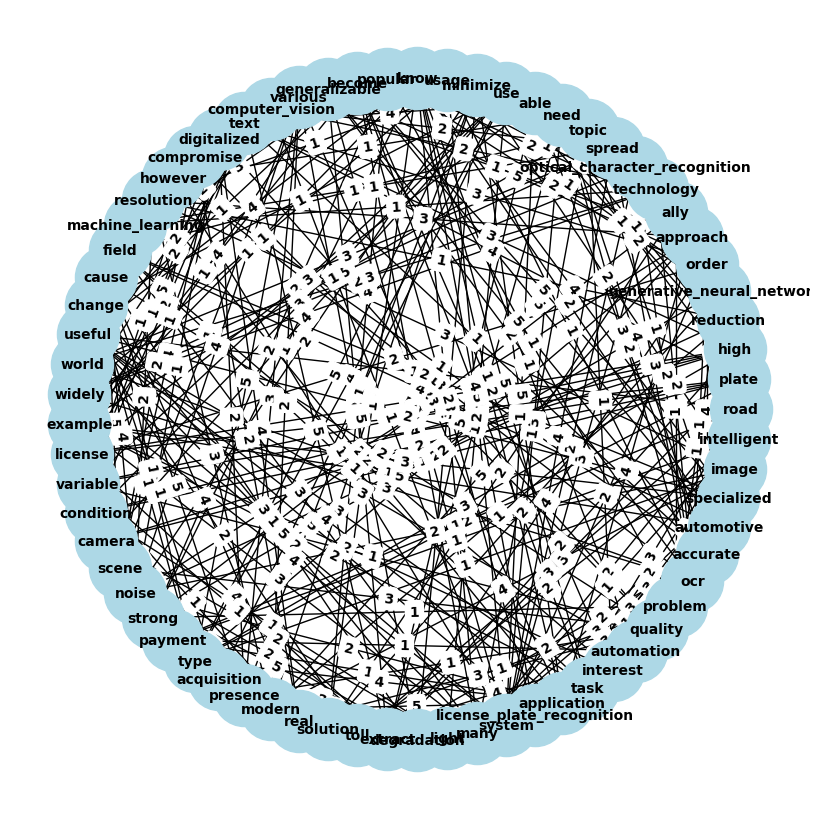

In [16]:
print(len(ke.unique_tokens))
labels = nx.get_edge_attributes(ke.graph,'weight')
print(ke.graph.edges)
print(labels)
#ke.add_we_weights()
ke.order_nodes()
ke.visualize_graph()

In [5]:
ke.order_nodes()

Node type:    ---     Node Order = 0.30337102791439585
Node application:    ---     Node Order = 0.28566201913511524
Node noise:    ---     Node Order = 0.2564903948151392
Node various:    ---     Node Order = 0.20146662876366966
Node degradation:    ---     Node Order = 0.19837166057911904
Node minimize:    ---     Node Order = 0.19826967120179081
Node modern:    ---     Node Order = 0.19047402463449073
Node variable:    ---     Node Order = 0.18480051668076072
Node presence:    ---     Node Order = 0.1758312468782241
Node many:    ---     Node Order = 0.17422438124522446
Node approach:    ---     Node Order = 0.17312898207007457
Node cause:    ---     Node Order = 0.1657162548775555
Node image:    ---     Node Order = 0.15551331940665944
Node scene:    ---     Node Order = 0.15534875283718777
Node know:    ---     Node Order = 0.14450328453180752
Node real:    ---     Node Order = 0.13773309017377264
Node license_plate_recognition:    ---     Node Order = 0.13496877517561398
Node use

In [6]:
from sklearn.metrics.pairwise import cosine_similarity

model = KeyedVectors.load('data/model.model')
a = get_word_em("nlp")
b = get_word_em("apple")
print(model.similarity("nlp", "apple"))
print(cosine_similarity(a.reshape(1, -1), b.reshape(1, -1))[0])
similar_words = model.similar_by_vector(a, topn=5)
print("\nWords similar to:")
for word, score in similar_words:
    print(f"{word}: {score}")

0.1576503
[0.1576503]

Words similar to:
nlp: 0.9999998807907104
hagelin: 0.7022942304611206
.760: 0.6916053891181946
inp: 0.6835891008377075
+18: 0.673696756362915


In [7]:
model = KeyedVectors.load('data/model.model')
# Find the vector representation of a word
word_vector = model["apple"]
print("Vector representation of 'apple':")
print(word_vector)

# Find similar words
similar_words = model.most_similar("apple", topn=5)
print("\nWords similar to 'apple':")
for word, score in similar_words:
    print(f"{word}: {score}")

# Perform vector arithmetic (e.g., king - man + woman = queen)
result = model.most_similar(positive=["king", "woman"], negative=["man"], topn=1)
print("\n'king' - 'man' + 'woman' =")
for word, score in result:
    print(f"{word}: {score}")

# Assuming you have already loaded a pretrained Word2Vec model
word1 = "learning"
word2 = "island"

# Calculate the similarity between two words
similarity_score = model.similarity(word1, word2)

print(f"Similarity between '{word1}' and '{word2}': {similarity_score:.2f}")


Vector representation of 'apple':
[ 0.52042  -0.8314    0.49961   1.2893    0.1151    0.057521 -1.3753
 -0.97313   0.18346   0.47672  -0.15112   0.35532   0.25912  -0.77857
  0.52181   0.47695  -1.4251    0.858     0.59821  -1.0903    0.33574
 -0.60891   0.41742   0.21569  -0.07417  -0.5822   -0.4502    0.17253
  0.16448  -0.38413   2.3283   -0.66682  -0.58181   0.74389   0.095015
 -0.47865  -0.84591   0.38704   0.23693  -1.5523    0.64802  -0.16521
 -1.4719   -0.16224   0.79857   0.97391   0.40027  -0.21912  -0.30938
  0.26581 ]

Words similar to 'apple':
blackberry: 0.7543067932128906
chips: 0.7438643574714661
iphone: 0.7429664134979248
microsoft: 0.7334205508232117
ipad: 0.7331036925315857

'king' - 'man' + 'woman' =
queen: 0.8523604273796082
Similarity between 'learning' and 'island': 0.25
